In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
plt.style.use('seaborn')
import random
from keras.utils import to_categorical
from keras.applications.resnet50 import ResNet50,decode_predictions
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

In [2]:
path = '/Users/jgoel/Desktop/Data Science Self/Support Vector Machine/images'
folders  = os.listdir(path)

folders

['cats', 'dogs', 'horses', 'humans']

In [3]:
image_data = []
labels = []
label_dict = {
    "cats":0,
    "dogs":1,
    "horses":2,
    "humans":3
}

In [4]:
for ix in folders:
    path_folder = os.path.join("{}/{}".format(path,ix))
    for im in os.listdir(path_folder):
        img = image.load_img(os.path.join(path_folder,im),target_size=(224,224))
        image_data.append(image.img_to_array(img))
        labels.append(label_dict[ix])

In [5]:
combined = list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:] = zip(*combined)

In [28]:
X_train = np.array(image_data)
y_train = np.array(labels)
y_train = to_categorical(y_train)

In [7]:
model = ResNet50(include_top = False,weights = 'imagenet',input_shape=(224,224,3))

model.summary()

C:\Users\jgoel\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [8]:
avp = GlobalAveragePooling2D()(model.output)
fcl = Dense(256,activation='relu')(avp)
d1 = Dropout(0.5)(fcl)
fc2 = Dense(4,activation='softmax')(d1)
model_new = Model(input= model.input,outputs= fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

C:\Users\jgoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """


In [9]:
adam = Adam(learning_rate=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=["accuracy"])

In [10]:
for ix in range(len(model_new.layers)):
    print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x00000219D678D588>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x00000219D6789B08>
2 <keras.layers.convolutional.Conv2D object at 0x00000219D6789788>
3 <keras.layers.normalization.BatchNormalization object at 0x00000219F4216588>
4 <keras.layers.core.Activation object at 0x00000219F436B488>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x00000219F4229408>
6 <keras.layers.pooling.MaxPooling2D object at 0x00000219F4378D48>
7 <keras.layers.convolutional.Conv2D object at 0x00000219F43AE7C8>
8 <keras.layers.normalization.BatchNormalization object at 0x00000219F43B0088>
9 <keras.layers.core.Activation object at 0x00000219F43B04C8>
10 <keras.layers.convolutional.Conv2D object at 0x00000219F43B01C8>
11 <keras.layers.normalization.BatchNormalization object at 0x00000219F43CDF48>
12 <keras.layers.core.Activation object at 0x00000219F43E8748>
13 <keras.layers.convolutional.Conv2D object at 0x00000219F43DB308>
14 <keras.layers.conv

In [11]:
for ix in range(169):
    model_new.layers[ix].trainable =False

In [12]:
model_new.compile(optimizer=adam,metrics=["accuracy"],loss='categorical_crossentropy')
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [13]:
history =model_new.fit(X_train,y_train,shuffle=True,batch_size=16,epochs=10,validation_split=0.2)

Train on 646 samples, validate on 162 samples
Epoch 1/10
646/646 [==============================] - 294s 455ms/step - loss: 1.2861 - accuracy: 0.4644 - val_loss: 0.8284 - val_accuracy: 0.6728
Epoch 2/10
646/646 [==============================] - 276s 428ms/step - loss: 0.6692 - accuracy: 0.7585 - val_loss: 0.5767 - val_accuracy: 0.8148
Epoch 3/10
646/646 [==============================] - 216s 335ms/step - loss: 0.4539 - accuracy: 0.8514 - val_loss: 0.3960 - val_accuracy: 0.8580
Epoch 4/10
646/646 [==============================] - 192s 298ms/step - loss: 0.3199 - accuracy: 0.9040 - val_loss: 0.3088 - val_accuracy: 0.9012
Epoch 5/10
646/646 [==============================] - 193s 299ms/step - loss: 0.2674 - accuracy: 0.9334 - val_loss: 0.2494 - val_accuracy: 0.9136
Epoch 6/10
646/646 [==============================] - 196s 304ms/step - loss: 0.2088 - accuracy: 0.9334 - val_loss: 0.2255 - val_accuracy: 0.9259
Epoch 7/10
646/646 [==============================] - 188s 291ms/step - loss: 

In [16]:
loss,accuracy = model_new.evaluate(X_train,y_train)

808/808 [==============================] - 193s 239ms/step


In [17]:
print("Accuracy = ",accuracy*100)
print("Loss = ",loss)

Accuracy =  96.53465151786804
Loss =  0.11024612310056639


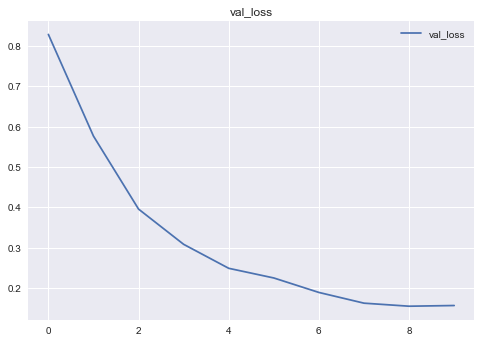

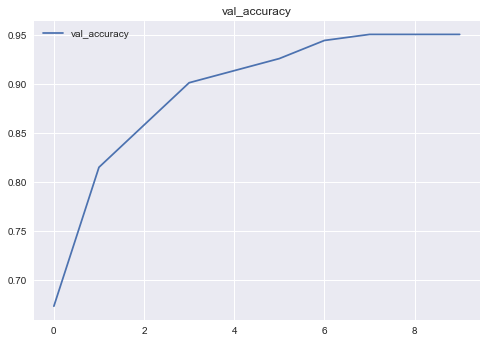

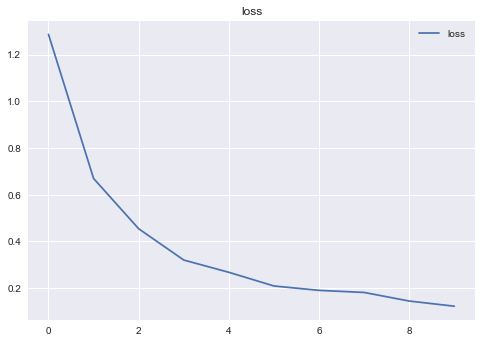

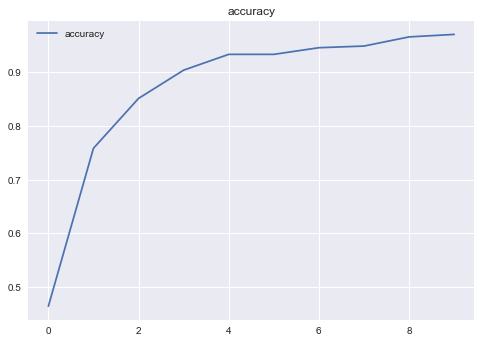

In [18]:
for key,value in (history.history).items():
    plt.plot(value,label=key)
    plt.title(key)
    plt.legend()
    plt.show()